## Algerian Forest Fires Dataset 
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
dataset=pd.read_csv('D:\Developement of api of Aws\End to End ML Project\Dataset\Algerian_forest_fires_cleaned_dataset.csv' ,header=1)

In [54]:
dataset.head()

,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4.1,0.5,not fire,0
0,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
1,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
2,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
3,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
4,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0


In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   1            242 non-null    int64  
 1   6            242 non-null    int64  
 2   2012         242 non-null    int64  
 3   29           242 non-null    int64  
 4   57           242 non-null    int64  
 5   18           242 non-null    int64  
 6   0.0          242 non-null    float64
 7   65.7         242 non-null    float64
 8   3.4          242 non-null    float64
 9   7.6          242 non-null    float64
 10  1.3          242 non-null    float64
 11  3.4.1        242 non-null    float64
 12  0.5          242 non-null    float64
 13  not fire     242 non-null    object 
 14  0            242 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.5+ KB


## Data Cleaning

In [56]:
## missing values
dataset[dataset.isnull().any(axis=1)]

,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4.1,0.5,not fire,0


The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [57]:
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1
df=dataset

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   1            242 non-null    int64  
 1   6            242 non-null    int64  
 2   2012         242 non-null    int64  
 3   29           242 non-null    int64  
 4   57           242 non-null    int64  
 5   18           242 non-null    int64  
 6   0.0          242 non-null    float64
 7   65.7         242 non-null    float64
 8   3.4          242 non-null    float64
 9   7.6          242 non-null    float64
 10  1.3          242 non-null    float64
 11  3.4.1        242 non-null    float64
 12  0.5          242 non-null    float64
 13  not fire     242 non-null    object 
 14  0            242 non-null    int64  
 15  Region       242 non-null    float64
dtypes: float64(8), int64(7), object(1)
memory usage: 30.4+ KB


In [59]:
df.head()

,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4.1,0.5,not fire,0,Region
0,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0.0
1,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0.0
2,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0.0
3,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0.0
4,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0,0.0


In [60]:
df[['Region']]=df[['Region']].astype(int)

In [61]:
df.head()

,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4.1,0.5,not fire,0,Region
0,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0
1,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0
2,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0
3,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0
4,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0,0


In [62]:
df.tail()

,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4.1,0.5,not fire,0,Region
237,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1,1
238,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1,1
239,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1,1
240,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1,1
241,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1,1


In [63]:
df.isnull().sum()

1              0
6              0
2012           0
29             0
57             0
18             0
0.0            0
65.7           0
3.4            0
7.6            0
1.3            0
3.4.1          0
0.5            0
not fire       0
0              0
Region         0
dtype: int64

In [64]:
## Removing the null values
df=df.dropna().reset_index(drop=True)


In [65]:
df.head()

,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4.1,0.5,not fire,0,Region
0,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0
1,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0
2,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0
3,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0
4,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0,0


In [66]:
df.isnull().sum()

1              0
6              0
2012           0
29             0
57             0
18             0
0.0            0
65.7           0
3.4            0
7.6            0
1.3            0
3.4.1          0
0.5            0
not fire       0
0              0
Region         0
dtype: int64

In [67]:
df.iloc[[122]]

,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4.1,0.5,not fire,0,Region
122,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1,1


In [68]:
##remove the 122nd row
df=df.drop(122).reset_index(drop=True)

In [69]:
df.iloc[[122]]

,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4.1,0.5,not fire,0,Region
122,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1,1


In [70]:
df.columns

Index(['1', '6', '2012', '29', '57', '18', '0.0', '65.7', '3.4', '7.6', '1.3',
       '3.4.1', '0.5', 'not fire   ', '0', 'Region'],
      dtype='object')

In [71]:
## fix spaces in columns names
df.columns=df.columns.str.strip()
df.columns

Index(['1', '6', '2012', '29', '57', '18', '0.0', '65.7', '3.4', '7.6', '1.3',
       '3.4.1', '0.5', 'not fire', '0', 'Region'],
      dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   1         241 non-null    int64  
 1   6         241 non-null    int64  
 2   2012      241 non-null    int64  
 3   29        241 non-null    int64  
 4   57        241 non-null    int64  
 5   18        241 non-null    int64  
 6   0.0       241 non-null    float64
 7   65.7      241 non-null    float64
 8   3.4       241 non-null    float64
 9   7.6       241 non-null    float64
 10  1.3       241 non-null    float64
 11  3.4.1     241 non-null    float64
 12  0.5       241 non-null    float64
 13  not fire  241 non-null    object 
 14  0         241 non-null    int64  
 15  Region    241 non-null    int32  
dtypes: float64(7), int32(1), int64(7), object(1)
memory usage: 29.3+ KB


#### Changes the required columns as integer data type

In [73]:
df.columns

Index(['1', '6', '2012', '29', '57', '18', '0.0', '65.7', '3.4', '7.6', '1.3',
       '3.4.1', '0.5', 'not fire', '0', 'Region'],
      dtype='object')

In [74]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

KeyError: "None of [Index(['month', 'day', 'year', 'Temperature', 'RH', 'Ws'], dtype='object')] are in the [columns]"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   1         241 non-null    int64  
 1   6         241 non-null    int64  
 2   2012      241 non-null    int64  
 3   29        241 non-null    int64  
 4   57        241 non-null    int64  
 5   18        241 non-null    int64  
 6   0.0       241 non-null    float64
 7   65.7      241 non-null    float64
 8   3.4       241 non-null    float64
 9   7.6       241 non-null    float64
 10  1.3       241 non-null    float64
 11  3.4.1     241 non-null    float64
 12  0.5       241 non-null    float64
 13  not fire  241 non-null    object 
 14  0         241 non-null    int64  
 15  Region    241 non-null    int32  
dtypes: float64(7), int32(1), int64(7), object(1)
memory usage: 29.3+ KB


In [ ]:
df.head()

,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4.1,0.5,not fire,0,Region
0,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0
1,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0
2,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0
3,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0
4,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0,0


#### Changing the other columns to float data datatype


In [ ]:
objects=[features for features in df.columns if df[features].dtypes=='O']

In [ ]:
objects

['not fire']

In [ ]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

ValueError: could not convert string to float: 'not fire   '

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   1         241 non-null    int64  
 1   6         241 non-null    int64  
 2   2012      241 non-null    int64  
 3   29        241 non-null    int64  
 4   57        241 non-null    int64  
 5   18        241 non-null    int64  
 6   0.0       241 non-null    float64
 7   65.7      241 non-null    float64
 8   3.4       241 non-null    float64
 9   7.6       241 non-null    float64
 10  1.3       241 non-null    float64
 11  3.4.1     241 non-null    float64
 12  0.5       241 non-null    float64
 13  not fire  241 non-null    object 
 14  0         241 non-null    int64  
 15  Region    241 non-null    int32  
dtypes: float64(7), int32(1), int64(7), object(1)
memory usage: 29.3+ KB


In [ ]:
objects

['not fire']

In [ ]:
df.describe()

,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4.1,0.5,0,Region
count,241.000000,241.000000,241.0,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,15.879668,7.514523,2012.0,32.174274,62.016598,15.493776,0.752697,77.984647,14.777178,49.777178,4.773859,16.802905,7.090871,0.497925,0.493776
std,8.782442,1.110929,0.0,3.634717,14.869422,2.813835,2.000022,14.316097,12.398778,47.710698,4.156874,14.233550,7.446319,0.501036,0.501002
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.600000,5.800000,14.700000,1.400000,6.100000,0.800000,0.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.700000,11.300000,33.400000,3.500000,12.500000,4.700000,0.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,74.000000,17.000000,0.500000,88.300000,20.900000,71.000000,7.300000,22.900000,11.600000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [ ]:
df.head()

,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4.1,0.5,not fire,0,Region
0,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0
1,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0
2,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0
3,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0
4,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0,0


In [ ]:
## Let ave the cleaned dataset
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

##  Exploratory Data Analysis

In [ ]:
## drop day,month and year
df_copy=df.drop(['day','month','year'],axis=1)

KeyError: "['day' 'month' 'year'] not found in axis"

In [ ]:
df_copy.head()

NameError: name 'df_copy' is not defined

In [ ]:
## categories in classes
df_copy['Classes'].value_counts()

NameError: name 'df_copy' is not defined

In [ ]:
## Encoding of the categories in classes
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

NameError: name 'df_copy' is not defined

In [ ]:
df_copy.head()

NameError: name 'df_copy' is not defined

In [ ]:
df_copy.tail()

NameError: name 'df_copy' is not defined

In [ ]:
df_copy['Classes'].value_counts()

NameError: name 'df_copy' is not defined

In [ ]:
## Plot desnity plot for all features
plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

NameError: name 'df_copy' is not defined

In [ ]:
## Percentage for Pie Chart
percentage=df_copy['Classes'].value_counts(normalize=True)*100

NameError: name 'df_copy' is not defined

In [ ]:
# plotting piechart
classlabels=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

NameError: name 'percentage' is not defined

<Figure size 1200x700 with 0 Axes>

## Correlation

In [ ]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


C:\Users\Amanc\AppData\Local\Temp\ipykernel_12652\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

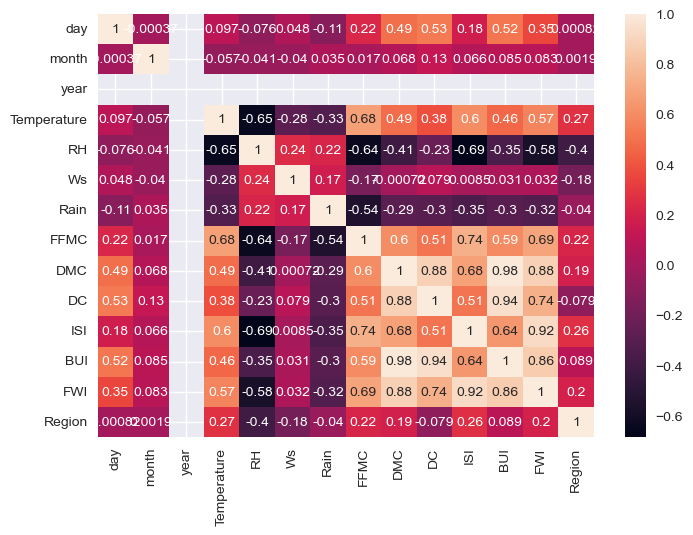

In [ ]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

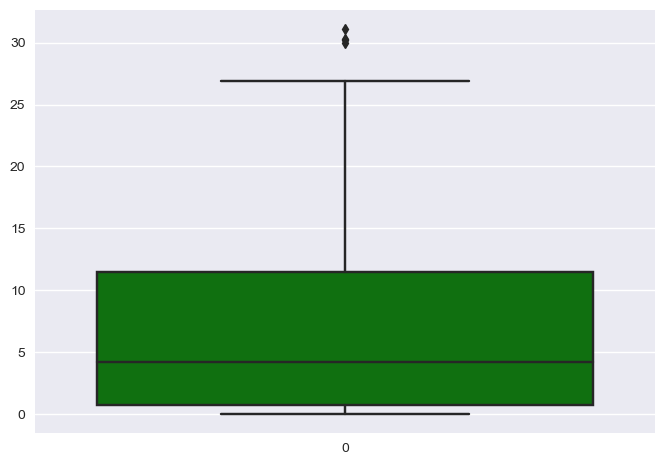

In [ ]:
## Box Plots
sns.boxplot(df['FWI'],color='green')

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

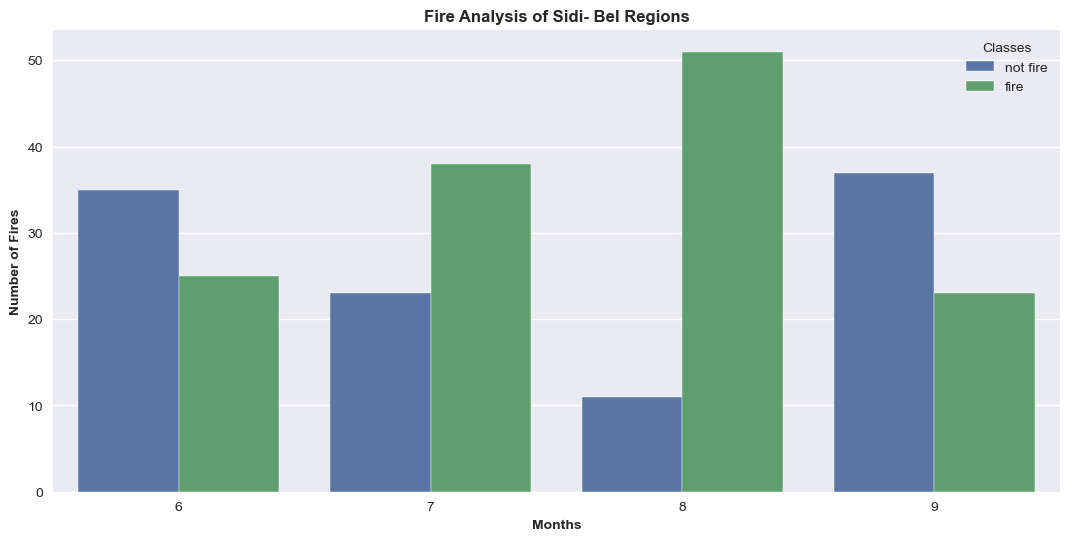

In [ ]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

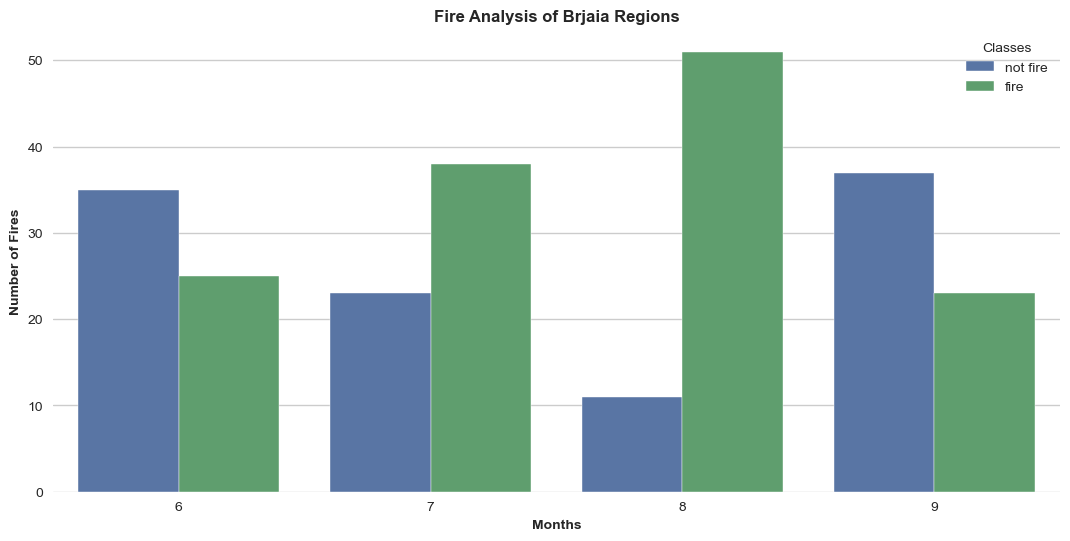

In [ ]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')

Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

Less Fires was on September